In [19]:
import torch
import torch.nn as nn
import numpy as np
import torchaudio
import torchaudio.transforms as transforms
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

### 1. Loading the data

In [74]:
example_file_list = ["dataset/parc_audios/data/audio_2.ogg", "dataset/bird_songs/#eubeat1/XC116937.ogg", "dataset/bird_songs/#eubeat1/XC56698.ogg", "dataset/bird_songs/#eubeat1/XC54954.ogg"]
sample_rate = 30000

In [75]:
waveform_list = []
for file in example_file_list:
    waveform, sr = librosa.load(file, sr=sample_rate)
    waveform_list.append(waveform)
    print("Waveform shape:", waveform.shape)  # (channels, samples)
    print("Sample rate:", sr)

Waveform shape: (52294156,)
Sample rate: 30000
Waveform shape: (308160,)
Sample rate: 30000
Waveform shape: (423968,)
Sample rate: 30000
Waveform shape: (773486,)
Sample rate: 30000


In [76]:
for i in range(len(waveform_list)):
    waveform_list[i] = torch.tensor(waveform_list[i])

    if waveform_list[i].ndim == 1:
        waveform_list[i] = waveform_list[i].unsqueeze(0)  # shape: (1, num_samples)

### 2. Transformation en Mel-spectrogramme

In [77]:
mel_transform = transforms.MelSpectrogram(
    sample_rate=sr,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
db_transform = transforms.AmplitudeToDB(stype="power", top_db=40)

mel_spect_list, mel_spect_db_list = [], []

for waveform in waveform_list:

    mel_specgram = mel_transform(waveform)       #(channels, n_mels, time)
    mel_spect_db = db_transform(mel_specgram)

    mel_spect_db_list.append(mel_spect_db)
    mel_spect_list.append(mel_specgram)

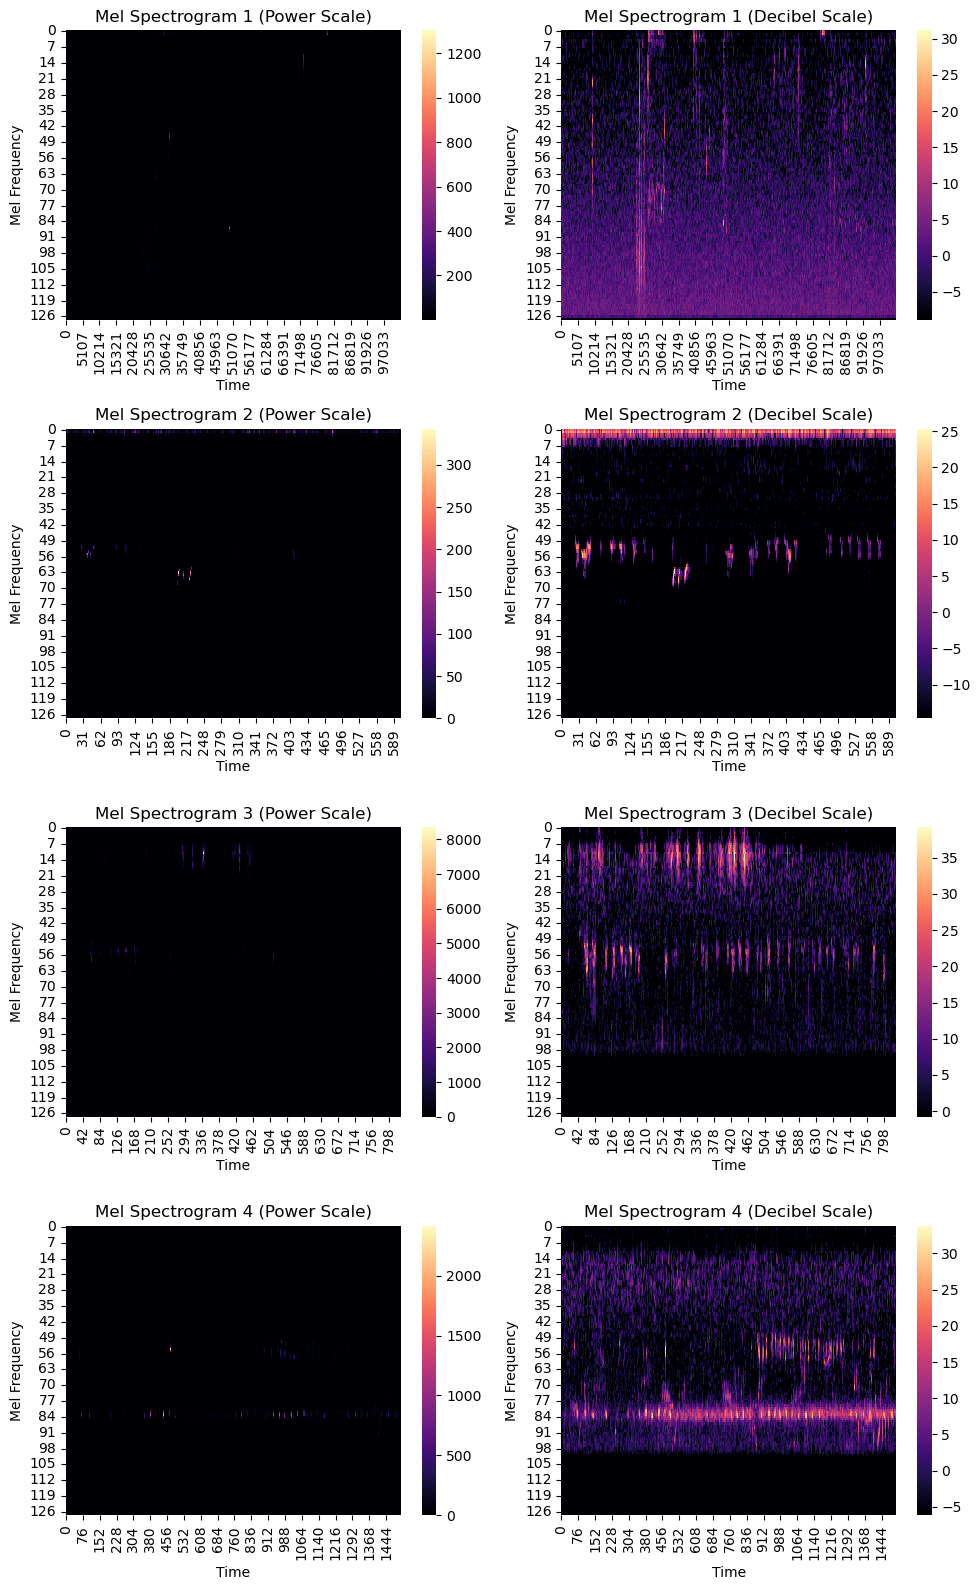

In [78]:
plt.figure(figsize=(10, 4 * len(mel_spect_list)))

for i in range(len(mel_spect_list)):
    # Power spectrogram
    plt.subplot(len(mel_spect_list), 2, 2 * i + 1)
    sns.heatmap(mel_spect_list[i].squeeze(0).numpy(), cmap="magma")
    plt.title(f"Mel Spectrogram {i+1} (Power Scale)")
    plt.xlabel("Time")
    plt.ylabel("Mel Frequency")

    # dB-scaled spectrogram
    plt.subplot(len(mel_spect_list), 2, 2 * i + 2)
    sns.heatmap(mel_spect_db_list[i].squeeze(0).numpy(), cmap="magma")
    plt.title(f"Mel Spectrogram {i+1} (Decibel Scale)")
    plt.xlabel("Time")
    plt.ylabel("Mel Frequency")

plt.tight_layout()
plt.show()
